# Lollipop plots

This example shows how lollipop plots can be used to visualize the number of times each value occurs in a variable (this is known as value counts).

## Includes: viz_data_quality and other libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from vizdataquality import calculate as vdqc, datasets as vdqd, plot as vdqp

In [24]:
mpl.style.use('tableau-colorblind10')

## Get a dataframe's profile

In [25]:
num_rows, df = vdqd.get_dataset('value counts 1')

## Visualize the value counts of one variable

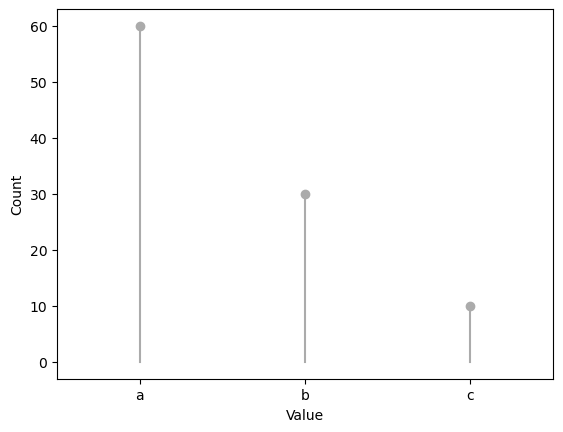

In [26]:
value_counts = df[df.columns[0]].value_counts()
vdqp.lollipop(value_counts)

## Customise the visualization

** WARNING ** vizdataquality, plot.py, _draw_fig(): Figure not output because a file with the supplied name already exists.
value counts.jpg


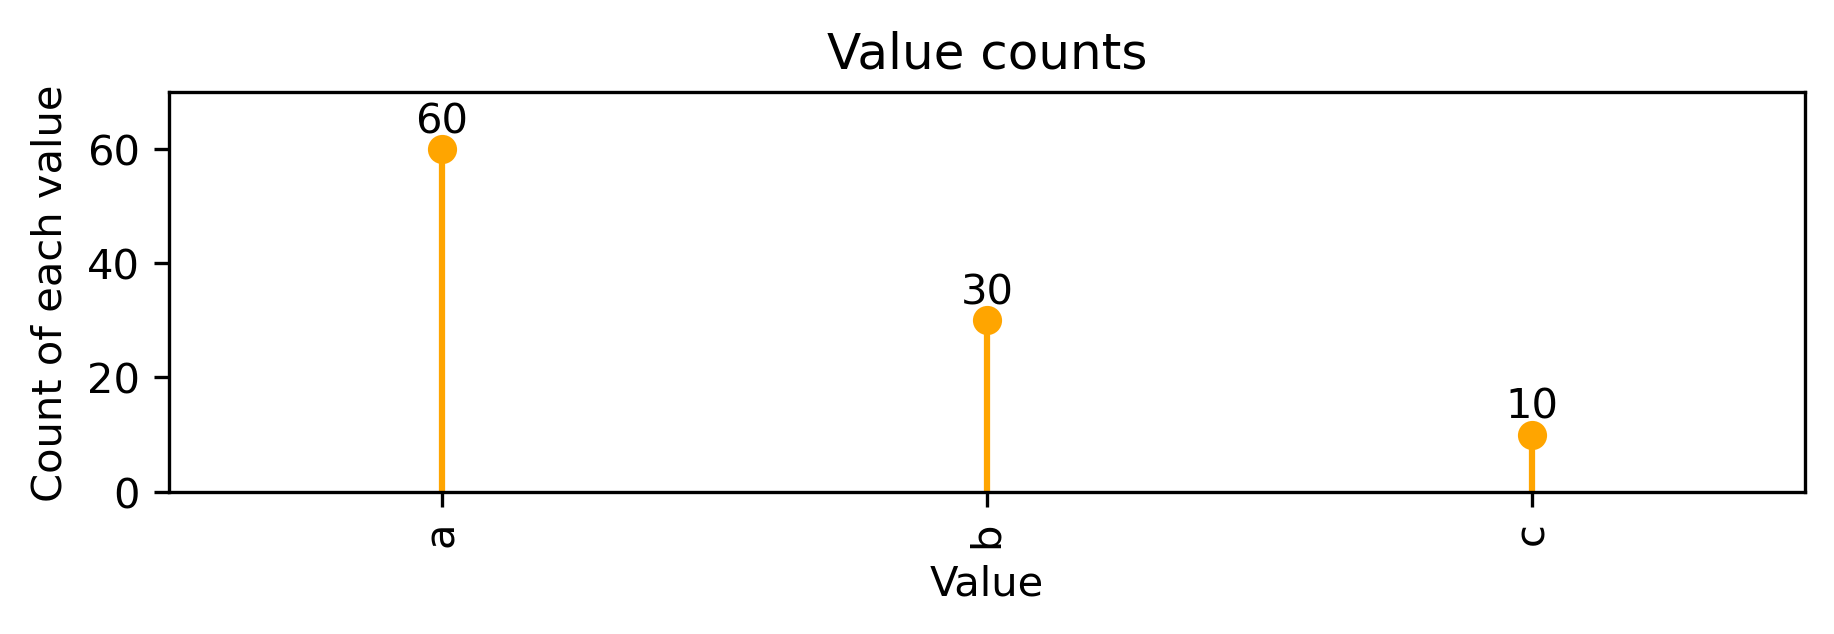

In [27]:
# A dictionary of keyword arguments that are passed to the Matplotlib Figure object
fig_kw = {'size_inches': (6, 2), 'dpi': 300, 'constrained_layout': True}
# A dictionary of keyword arguments that are passed to the Matplotlib Axes object
# ylim has been set so the labels fit within the plot
ax_kw = {'title': 'Value counts', 'xlabel': 'Value', 'ylabel': 'Count of each value', 'ylim': (0, 70)}
# A dictionary of keyword arguments that are passed to the Matplotlib scatter and plot objects
kwargs = {'color': 'orange'}
# Rotate the X axis labels, save the plot to a file and apply the keyword arguments
vdqp.lollipop(value_counts, xlabels_rotate=90, datalabels=True, filename='value counts.jpg', fig_kw=fig_kw, ax_kw=ax_kw, **kwargs)

## Horizontal rather than vertical plot

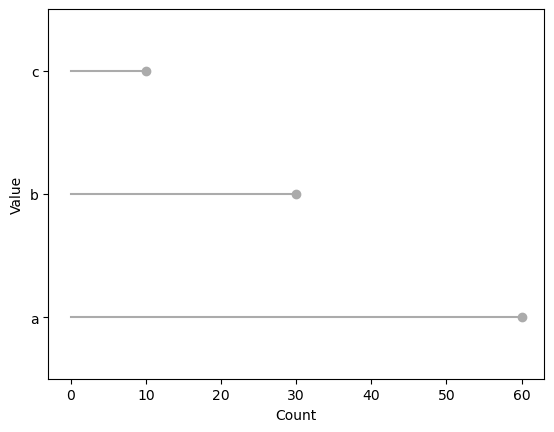

In [28]:
vdqp.lollipop(value_counts, vert=False)

## The values can be divided into multiple plots (useful if there are many unique values)

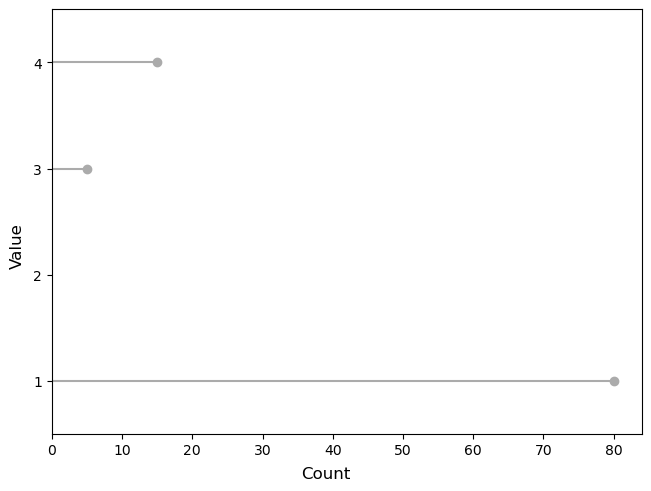

In [29]:
fig_kw = {'constrained_layout': True}
ax_kw = {'xlim': 0}
vdqp.multiplot('lollipop', df['Categorical (ints)'].value_counts(), number_of_variables_per_row=5, vert=False, fig_kw=fig_kw, ax_kw=ax_kw)

## Numerical values may be plotted on a continuous or discrete axis

 A continuous axis highlights gaps in values, where as a discrete axis only shows the values that occur.

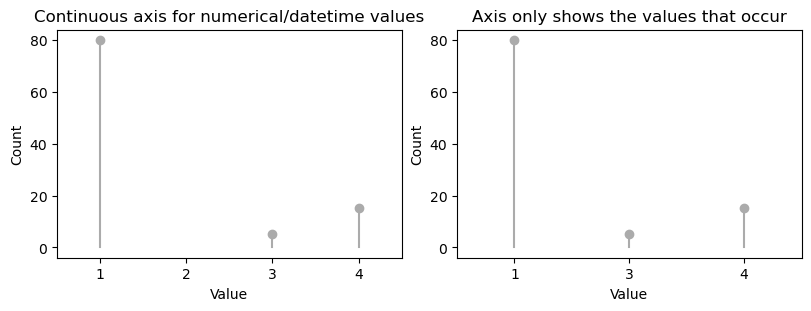

In [30]:
vcints = df['Categorical (ints)'].value_counts()
nrow = 1
ncol = 2
fig, axs = plt.subplots(nrow, ncol)
fig_kw = {'size_inches': (8, 3), 'constrained_layout': True}
fig.set(**fig_kw)
title = 'Continuous axis for numerical/datetime values'
cva = True

for l1 in range(ncol):
        ax_kw = {'title': title, 'xlabel': 'Value', 'ylabel': 'Count'}
        vdqp.lollipop(vcints, ax_input=axs[l1], continuous_value_axis=cva, ax_kw=ax_kw)
        title = 'Axis only shows the values that occur'
        cva = False
            

## Value counts for multiple variables can be shown as a grid of plots

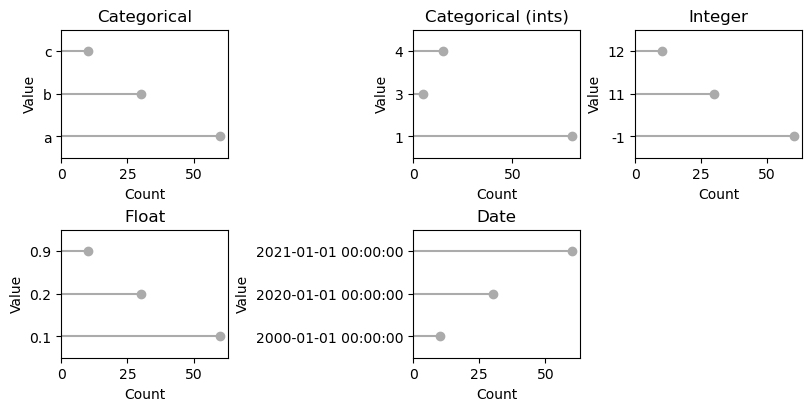

In [31]:
fig_kw = {'size_inches': (8, 4), 'constrained_layout': True}
ax_kw = {'xlim': 0, 'title':df.columns.tolist()}
vdqp.plotgrid('value counts', df, num_cols=3, vert=False, continuous_value_axis=cva, fig_kw=fig_kw, ax_kw=ax_kw)

### You can also create a grid manually

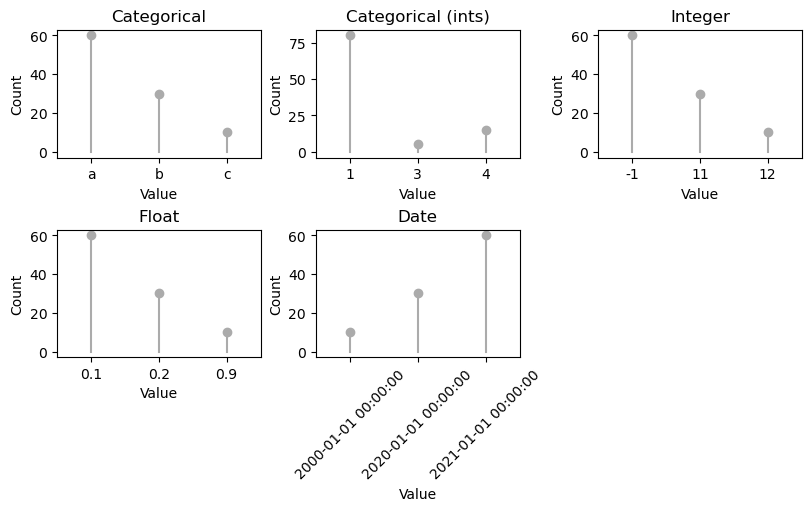

In [32]:
nrow = 2
ncol = 3
fig, axs = plt.subplots(nrow, ncol)
fig_kw = {'size_inches': (8, 5), 'constrained_layout': True}
fig.set(**fig_kw)

count = 0

for l1 in range(nrow):
    for l2 in range(ncol):
        if count < df.shape[1]:
            col = df.columns[count]
            ax_kw = {'title': col, 'xlabel': 'Value', 'ylabel': 'Count'}
            vdqp.lollipop(df[col].value_counts(), ax_input=axs[l1, l2], ax_kw=ax_kw, xlabels_rotate=(45 if count == 4 else 0), continuous_value_axis=cva)
        else:
            axs[l1, l2].axis('off')
            
        count += 1
            